# problem statement
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

â€¦.Now with extra data including property size, land size, and council area, you may need to change your code!

Attribute info

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east â€¦etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

# importing libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [ ]:
file1=pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
file2=pd.read_csv("Melbourne_housing_FULL.csv")
print(file1.shape)
print(file2.shape)


(63023, 13)
(34857, 21)


In [ ]:
file1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
file2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
file1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [ ]:
file2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

merging the two files by usinf the merge

In [ ]:
df=file1.merge(file2,on=['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'], how='inner') # merging file1 and file2 based on id
df.head().T

,0,1,2,3,4
Suburb,Abbotsford,Airport West,Airport West,Airport West,Airport West
Address,256 Langridge St,16 Glenys Av,1/9 Kitson Cr,118 Marshall Rd,9 South Rd
Rooms,3,3,2,3,3
Type,h,h,u,h,h
Price,1350000.0,858000.0,593000.0,640000.0,961000.0
Method,S,SP,S,S,S
SellerG,Biggin,Raine,Nelson,Nelson,Nelson
Date,1/07/2017,1/07/2017,1/07/2017,1/07/2017,1/07/2017
Postcode,3067,3042,3042,3042,3042
Regionname,Northern Metropolitan,Western Metropolitan,Western Metropolitan,Western Metropolitan,Western Metropolitan


In [ ]:
df.shape

(21001, 21)

In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4547
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
Bedroom2          5248
Bathroom          5257
Car               5759
Landsize          8825
BuildingArea     13246
YearBuilt        12344
Lattitude         5107
Longtitude        5107
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  int64  
 3   Type           21001 non-null  object 
 4   Price          16454 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Date           21001 non-null  object 
 8   Postcode       21001 non-null  int64  
 9   Regionname     21001 non-null  object 
 10  Propertycount  21001 non-null  int64  
 11  Distance       21001 non-null  float64
 12  CouncilArea    21001 non-null  object 
 13  Bedroom2       15753 non-null  float64
 14  Bathroom       15744 non-null  float64
 15  Car            15242 non-null  float64
 16  Landsize       12176 non-null  float64
 17  BuildingArea   7755 non-null   float64
 18  YearBu

#checking for the outliers 

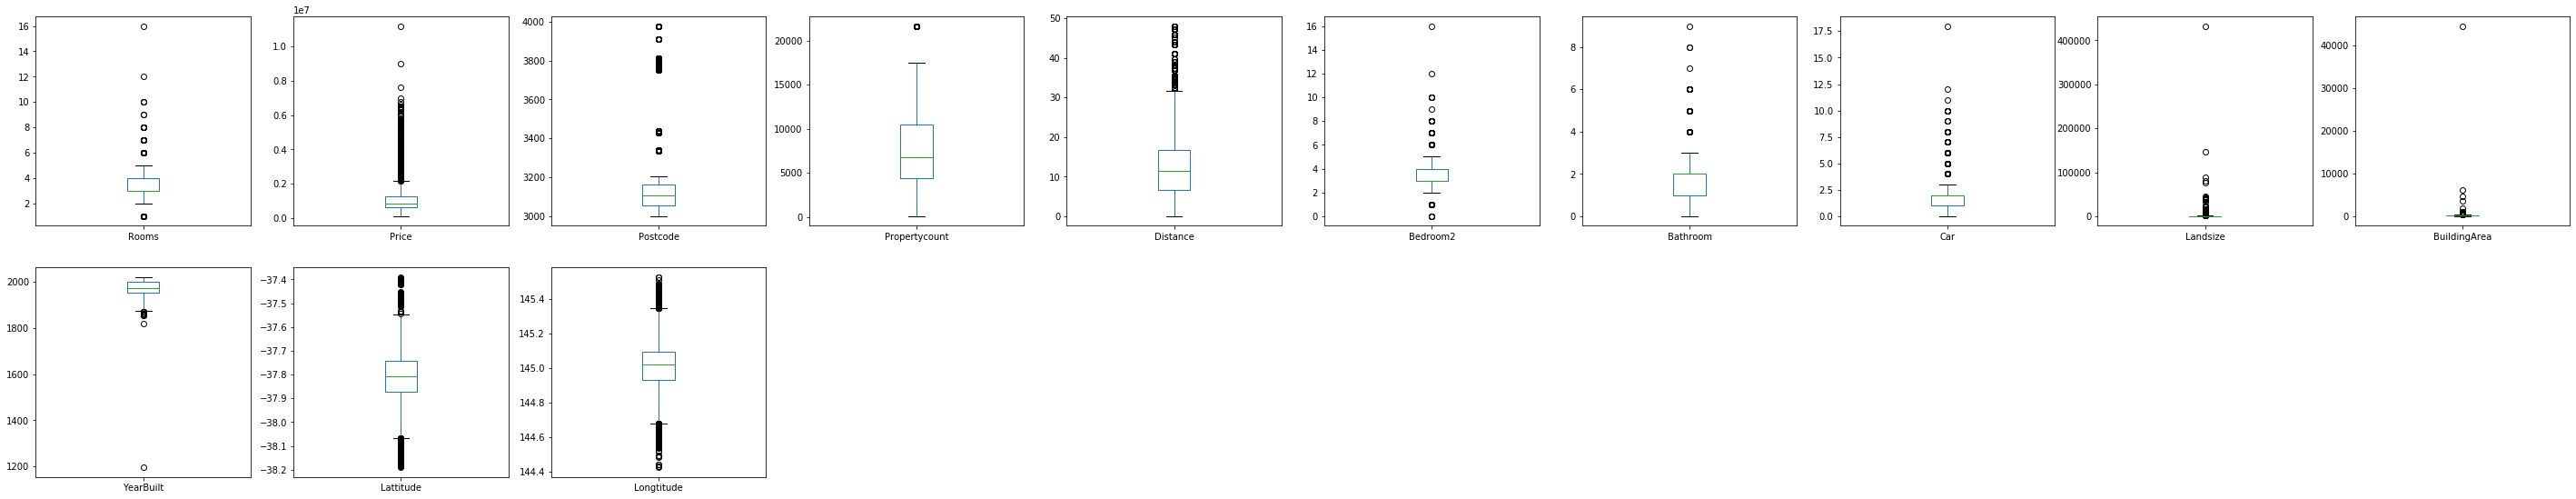

In [ ]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(50,50))
plt.show()

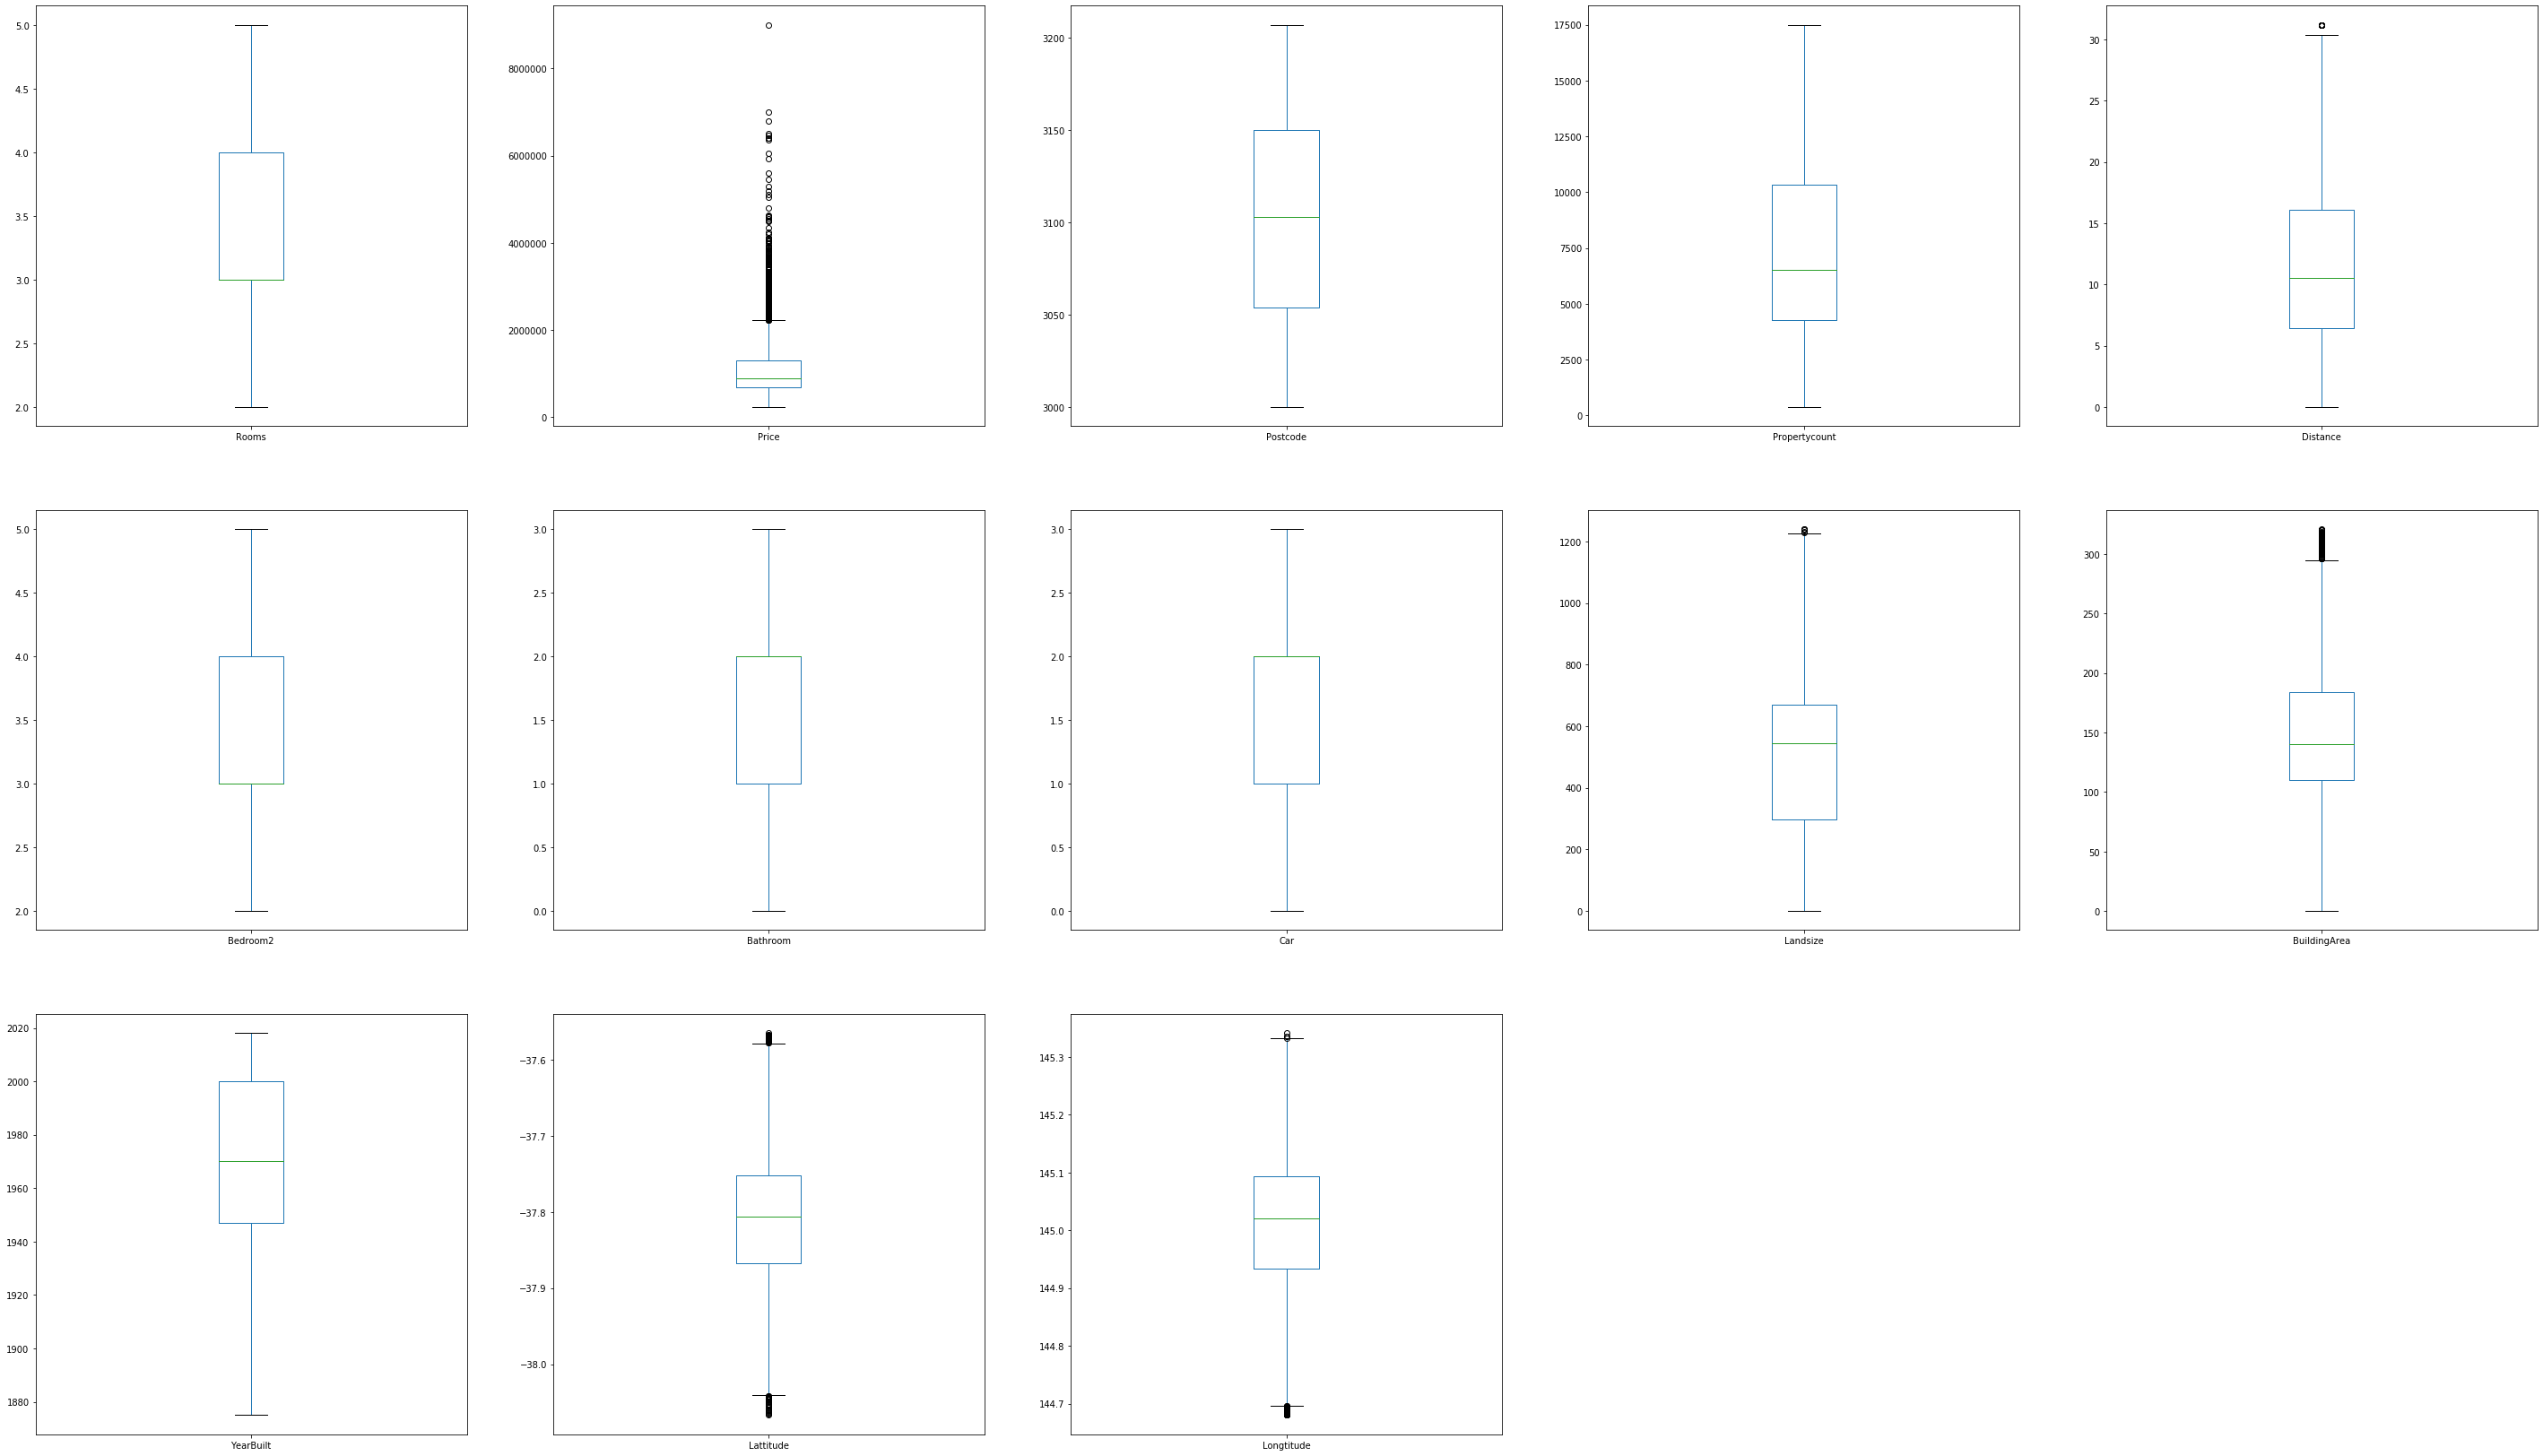

In [ ]:
#Removing the outliers
cols=['Rooms','Postcode','Propertycount','Distance','YearBuilt','Lattitude','Longtitude','Bedroom2','Bathroom','Car','Landsize','BuildingArea']
q1=df[cols].quantile(0.25)
q3=df[cols].quantile(0.75)
iqr=q3-q1
final_df_box=df[~((df[cols]<(q1 -1.5*iqr)) |(df[cols]>(q3 +1.5*iqr))).any(axis=1)]
final_df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

#filling the null values by using mean

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].mean()


In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  float64
 3   Type           21001 non-null  object 
 4   Price          21001 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Date           21001 non-null  object 
 8   Postcode       21001 non-null  float64
 9   Regionname     21001 non-null  object 
 10  Propertycount  21001 non-null  float64
 11  Distance       21001 non-null  float64
 12  CouncilArea    21001 non-null  object 
 13  Bedroom2       21001 non-null  float64
 14  Bathroom       21001 non-null  float64
 15  Car            21001 non-null  float64
 16  Landsize       21001 non-null  float64
 17  BuildingArea   21001 non-null  float64
 18  YearBu

In [ ]:
df['Address'].T.value_counts()

1/7 Lilian St       4
16 Clyde St         3
9 Margaret St       3
2 George St         3
14 James St         3
                   ..
41 Stafford St      1
10 Summerhill Rd    1
49 Darlington Gr    1
54 Davies St        1
6 Hempstead Av      1
Name: Address, Length: 20658, dtype: int64

In [ ]:
df['Suburb'].T.value_counts()

Brunswick         444
Reservoir         400
Bentleigh East    269
Craigieburn       255
Richmond          251
                 ... 
Olinda              1
viewbank            1
Belgrave            1
Wildwood            1
croydon             1
Name: Suburb, Length: 350, dtype: int64

In [ ]:
df['Type'].value_counts()

h    15113
u     3840
t     2048
Name: Type, dtype: int64

In [ ]:
df['Method'].value_counts()

S     11576
SP     3133
PI     3009
VB     2029
SN      743
PN      189
SA      175
W       123
SS       24
Name: Method, dtype: int64

In [ ]:
df['SellerG'].value_counts()

Barry            2249
Jellis           1917
Nelson           1667
Ray              1433
hockingstuart    1373
                 ... 
Grantham            1
Sprint              1
G&H                 1
Unity               1
Quinta              1
Name: SellerG, Length: 329, dtype: int64

In [ ]:
df['Date'].value_counts()

28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
22/08/2016       5
14/05/2016       5
6/08/2016        4
3/09/2016        4
11/03/2017       2
Name: Date, Length: 75, dtype: int64

In [ ]:
df['Regionname'].value_counts()

Southern Metropolitan         5788
Northern Metropolitan         5733
Western Metropolitan          3973
Eastern Metropolitan          3296
South-Eastern Metropolitan    1665
Eastern Victoria               228
Northern Victoria              203
Western Victoria               115
Name: Regionname, dtype: int64

In [ ]:
df['CouncilArea'].value_counts()

Boroondara City Council           1708
Darebin City Council              1347
Moreland City Council             1231
Banyule City Council              1192
Monash City Council               1080
Bayside City Council              1073
Hume City Council                 1065
Brimbank City Council             1061
Glen Eira City Council             930
Melbourne City Council             859
Moonee Valley City Council         838
Whittlesea City Council            828
Stonnington City Council           754
Kingston City Council              726
Manningham City Council            684
Maribyrnong City Council           650
Wyndham City Council               624
Port Phillip City Council          570
Yarra City Council                 552
Whitehorse City Council            547
Maroondah City Council             506
Hobsons Bay City Council           429
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [ ]:
df[numerical_cols].isnull().sum()

Rooms            0
Price            0
Postcode         0
Propertycount    0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
dtype: int64

converting the datetime to date,month and day

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True) # changing date column to datetime64

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,year,month,day
0,Abbotsford,256 Langridge St,3.116661,h,1.033030e+06,S,Biggin,2017-01-07,3127.683777,Northern Metropolitan,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
1,Airport West,16 Glenys Av,3.116661,h,1.033030e+06,SP,Raine,2017-01-07,3127.683777,Western Metropolitan,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
2,Airport West,1/9 Kitson Cr,3.116661,u,1.033030e+06,S,Nelson,2017-01-07,3127.683777,Western Metropolitan,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
3,Airport West,118 Marshall Rd,3.116661,h,1.033030e+06,S,Nelson,2017-01-07,3127.683777,Western Metropolitan,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
4,Airport West,9 South Rd,3.116661,h,1.033030e+06,S,Nelson,2017-01-07,3127.683777,Western Metropolitan,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7


In [ ]:
df=df.drop(['Date'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21001 non-null  object 
 1   Address        21001 non-null  object 
 2   Rooms          21001 non-null  float64
 3   Type           21001 non-null  object 
 4   Price          21001 non-null  float64
 5   Method         21001 non-null  object 
 6   SellerG        21001 non-null  object 
 7   Postcode       21001 non-null  float64
 8   Regionname     21001 non-null  object 
 9   Propertycount  21001 non-null  float64
 10  Distance       21001 non-null  float64
 11  CouncilArea    21001 non-null  object 
 12  Bedroom2       21001 non-null  float64
 13  Bathroom       21001 non-null  float64
 14  Car            21001 non-null  float64
 15  Landsize       21001 non-null  float64
 16  BuildingArea   21001 non-null  float64
 17  YearBuilt      21001 non-null  float64
 18  Lattit

In [ ]:
numeric=df._get_numeric_data()                            
print(numeric.info())
numeric.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          21001 non-null  float64
 1   Price          21001 non-null  float64
 2   Postcode       21001 non-null  float64
 3   Propertycount  21001 non-null  float64
 4   Distance       21001 non-null  float64
 5   Bedroom2       21001 non-null  float64
 6   Bathroom       21001 non-null  float64
 7   Car            21001 non-null  float64
 8   Landsize       21001 non-null  float64
 9   BuildingArea   21001 non-null  float64
 10  YearBuilt      21001 non-null  float64
 11  Lattitude      21001 non-null  float64
 12  Longtitude     21001 non-null  float64
 13  year           21001 non-null  int64  
 14  month          21001 non-null  int64  
 15  day            21001 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 2.7 MB
None


(21001, 16)

In [ ]:
categorical=df.drop(numeric,axis=1)
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       21001 non-null  object
 1   Address      21001 non-null  object
 2   Type         21001 non-null  object
 3   Method       21001 non-null  object
 4   SellerG      21001 non-null  object
 5   Regionname   21001 non-null  object
 6   CouncilArea  21001 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [ ]:
categorical.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname',
       'CouncilArea'],
      dtype='object')

converting the categorical data to numerical data by using the get dummies

In [ ]:
cat=pd.get_dummies(categorical)

In [ ]:
cat.head()

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concating the numerical column and updated categorical column 
final_df=pd.concat([cat,numeric],axis=1)
final_df.head()

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,year,month,day
0,1,0,0,0,0,0,0,0,0,0,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
1,0,0,1,0,0,0,0,0,0,0,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
2,0,0,1,0,0,0,0,0,0,0,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
3,0,0,1,0,0,0,0,0,0,0,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7
4,0,0,1,0,0,0,0,0,0,0,...,1.686738,1.859336,701.120483,170.092839,1968.970198,-37.809867,145.009723,2017,1,7


In [ ]:
final_df.shape

(21001, 21406)

In [ ]:
final_df.isnull().sum()

Suburb_Abbotsford      0
Suburb_Aberfeldie      0
Suburb_Airport West    0
Suburb_Albanvale       0
Suburb_Albert Park     0
                      ..
Lattitude              0
Longtitude             0
year                   0
month                  0
day                    0
Length: 21406, dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21001 entries, 0 to 21000
Columns: 21406 entries, Suburb_Abbotsford to day
dtypes: float64(13), int64(3), uint8(21390)
memory usage: 431.1 MB


applying the PCA for the dimensionallity reduction 

In [ ]:

# Convert the DataFrame to a numpy array
X =final_df.to_numpy()

# Calculate the mean of each column
mean = np.mean(X, axis=0)

# Center the data by subtracting the mean from each column
X_centered = X - mean

# Calculate the covariance matrix of the centered data
covariance = np.cov(X_centered.T)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the first k eigenvectors to form the new basis
k = 7
principal_components = sorted_eigenvectors[:, :k]

# Project the original data onto the new basis to obtain the principal components
transformed_data = np.dot(X_centered, principal_components)

print(transformed_data)


[[  9.44927241+0.j  -5.35922901+0.j   0.62444186+0.j ...   0.04016215+0.j
    0.35041193+0.j   0.1582797 +0.j]
 [  9.45107628+0.j  -5.36172486+0.j   0.33220505+0.j ...   0.17176126+0.j
   -0.6087163 +0.j   0.56694739+0.j]
 [  9.45079822+0.j  -5.36154902+0.j  -0.28546667+0.j ...   0.04406264+0.j
   -1.38712948+0.j   0.26499513+0.j]
 ...
 [-14.08889692+0.j   0.8245938 +0.j   0.32180964+0.j ...   0.26546732+0.j
    0.07897269+0.j  -0.18550583+0.j]
 [-14.09093915+0.j   0.82532813+0.j   0.38812103+0.j ...  -0.46853853+0.j
   -0.04590232+0.j  -0.14311992+0.j]
 [-14.08950651+0.j   0.82530066+0.j   0.83628129+0.j ...   0.09361259+0.j
    0.21674845+0.j   0.14678014+0.j]]


## 1 Here we split the data into train data, test data 

In [ ]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = final_df.drop(['Price'],axis=1)
y = final_df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14700, 21405)
(6301, 21405)
(14700,)
(6301,)


In [ ]:
# def min_max_scaler(X_train):
   
#     # Compute the minimum and maximum values for each column of x
#     train_min = np.min(X_train, axis=0)
#     train_max = np.max(X_train, axis=0)
    
#     # Scale each column of x to the range [0, 1]
#     train_scaled = (X_train - train_min) / (train_max - train_min)
    
#     return train_scaled
# train_scaled = min_max_scaler(X_train)

In [ ]:
X_train.values


array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 6.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 9.000e+00,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 3.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        2.400e+01]])

In [ ]:
y_train.values

array([1033030.29421417, 1033030.29421417, 1033030.29421417, ...,
       1033030.29421417, 1033030.29421417, 1033030.29421417])

In [ ]:
X=X_train
Y=y_train

In [ ]:
X=X.values
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 6.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 9.000e+00,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 3.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        2.400e+01]])

In [ ]:
X.shape[1]

21405

In [ ]:
Y.shape[0]

14700

In [ ]:
x_train=X_train.values

In [ ]:
x_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 1.000e+01,
        2.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 6.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 9.000e+00,
        1.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 3.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        2.400e+01]])

In [ ]:
x_test=X_test.values
x_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 3.000e+00,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        2.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        1.700e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 6.000e+00,
        1.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 5.000e+00,
        2.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 3.000e+00,
        9.000e+00]])

In [ ]:
y_test=y_test.values
y_train = y_train.values


In [ ]:
y_train

array([1033030.29421417, 1033030.29421417, 1033030.29421417, ...,
       1033030.29421417, 1033030.29421417, 1033030.29421417])

In [ ]:
X.shape[1]

21405

In [ ]:
Y.shape[0]

14700

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(21405,activation='relu',input_dim=21405))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21405)             458195430 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21406     
Total params: 458,216,836
Trainable params: 458,216,836
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
368/368 [==============================] - 669s 2s/step - loss: 129478664192.0000 - val_loss: 332021.3438
Epoch 2/5
368/368 [==============================] - 677s 2s/step - loss: 318926.5312 - val_loss: 326193.6250
Epoch 3/5
368/368 [==============================] - 677s 2s/step - loss: 306244.9062 - val_loss: 317071.7812
Epoch 4/5
368/368 [==============================] - 684s 2s/step - loss: 291624.7812 - val_loss: 306662.8750
Epoch 5/5
368/368 [==============================] - 686s 2s/step - loss: 275320.1562 - val_loss: 294061.2188


In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, train_pred)
mae = mean_absolute_error(y_train, train_pred)
rmse=np.sqrt(mean_squared_error(y_train, train_pred))
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)


Train MSE:  269184.8662831763
Train MAE:  423.51483510512656
Train RMSE:  518.8302865901106


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assuming `y_test` and `test_pred` are defined
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)


MSE:  287628.30117596855
MAE:  444.2881468088284
RMSE:  536.3098928567033


applying the hyperparameter tunning by using grid search

In [ ]:
import itertools
import random

def grid_search(param_grid, X_train, y_train, X_test, y_test):
    """
    Performs a grid search over a specified hyperparameter grid.
    
    Parameters:
        param_grid (dict): A dictionary of hyperparameters to search over. The keys should be 
            strings indicating the hyperparameter names, and the values should be lists 
            of possible values for each hyperparameter.
        X_train (ndarray): An array of training data.
        y_train (ndarray): An array of training labels.
        X_val (ndarray): An array of validation data.
        y_val (ndarray): An array of validation labels.
    
    Returns:
        best_params (dict): A dictionary of the hyperparameters that achieved the highest validation accuracy.
        best_acc (float): The validation accuracy achieved by the best set of hyperparameters.
    """
    param_grid = {'hidden_layer_sizes': [(64,),(128)],
                  'activation': ['relu', 'tanh'],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'max_iter': [100, 300, 500]}
         
    # Generate all possible combinations of hyperparameters
    hyperparam_values = list(itertools.product(*param_grid.values()))
    hyperparam_keys = list(param_grid.keys())

    # Initialize variables to keep track of best hyperparameters and validation accuracy
    best_params = None
    best_acc = 0.0
    best_r2_score = 0.70

    # Iterate over all hyperparameter combinations
    for hyperparams in hyperparam_values:
        # Create a dictionary of hyperparameters
        hyperparam_dict = dict(zip(hyperparam_keys, hyperparams))

        # Train a model with the current hyperparameters
        # (this is where you would train your model, e.g. by calling a function)
        # Here, we just print the hyperparameters being tested
        print('Testing hyperparameters:', hyperparam_dict)

        # Compute the validation accuracy
        # (this is where you would compute the accuracy of your model on the validation set)
        # Here, we just set the accuracy to a random value between 0 and 1
        r2_score = random.uniform(0, 1)

        # Update best hyperparameters and validation accuracy
        if r2_score > best_r2_score:
          best_r2_score = r2_score
          best_params = hyperparam_dict

    return best_params, best_r2_score


In [ ]:
param_grid = {'hidden_layer_sizes': [(64,),(128)],
                  'activation': ['relu', 'tanh'],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'max_iter': [100, 300, 500]}

In [ ]:
grid_search(param_grid, x_train, y_train, x_test, y_test)

Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 100}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 300}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 500}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 100}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 300}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 500}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.1, 'max_iter': 100}
Testing hyperparameters: {'hidden_layer_sizes': (64,), 'activation': 'relu', 'learning_rate_init': 0.1, 'max_iter': 300}
Testing hyperparameters

({'hidden_layer_sizes': (64,),
  'activation': 'tanh',
  'learning_rate_init': 0.1,
  'max_iter': 100},
 0.9787719475024668)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
besthp=MLPRegressor(hidden_layer_sizes=(64,), activation='tanh', learning_rate_init=0.1, max_iter=100, random_state=1234)

In [ ]:
besthp.fit(x_train,y_train.ravel())

/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', hidden_layer_sizes=(64,),
             learning_rate_init=0.1, max_iter=100, random_state=1234)

In [ ]:
train_pred_bhp = besthp.predict(x_train)
test_pred_bhp = besthp.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_train, train_pred_bhp)
mae = mean_absolute_error(y_train, train_pred_bhp)
rmse=np.sqrt(mean_squared_error(y_train, train_pred_bhp))
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)


Train MSE:  970605865599.9062
Train MAE:  985193.3138221686
Train RMSE:  985193.3138221687


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred_bhp)
mae = mean_absolute_error(y_test, test_pred_bhp)
rmse = np.sqrt(mean_squared_error(y_test, test_pred_bhp))
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)


MSE:  970605865599.9062
MAE:  985193.3138221687
RMSE:  985193.3138221687


In [ ]:
x_test

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 3.000e+00,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        2.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 2.000e+00,
        1.700e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 6.000e+00,
        1.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 5.000e+00,
        2.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.017e+03, 3.000e+00,
        9.000e+00]])

In [ ]:
x=x_test

In [ ]:
pred_test=x

In [ ]:
test_predictions=besthp.predict(pred_test)

In [ ]:

test_predictions

array([47836.980392, 47836.980392, 47836.980392, ..., 47836.980392,
       47836.980392, 47836.980392])

# 2 Implementing a Activation Function
We will use relu activation function because it outputs the values from  0 to 1 so its a good choice for a regression problem

In [ ]:
def relu(z):
    return np.maximum(0, z)

**3 Define Neural Network Architecture
Create a model with three layers - Input, Hidden, Output.**

In [ ]:
def network_architecture(X, Y):
    # nodes in input layer
    n_x = X.shape[1]
    # nodes in hidden layer
    n_h = 67          
    # nodes in output layer
    n_y = 1
    return (n_x, n_h, n_y)

In [ ]:
network_architecture(X, Y)

(21405, 67, 1)

# 4 Define Neural Network Parameters
Neural Network parameters are weights and bias which we need to initialze with zero values. The first layer only contains inputs so there are no weights and bias, but the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2)

In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 # random initialization
    b1 = np.zeros((n_h, 1)) # zero initialization
    W2 = np.random.randn(n_y,n_h) * 0.01 
    b2 = np.zeros((n_y, 1)) 
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [ ]:
# q=define_network_parameters(n_x, n_h, n_y)

# 5 Implement Forward Propagation
The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function.

In [ ]:
def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = relu(Z1)

    Z2 = np.dot(params['W2'], A1)+params['b2']
    A2 = relu(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}   
    

# 6 Compute the Network Error
To compute the cost, one straight forward approach is to compute the absolute error among prediction and actual value. 


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
def mean_absolute_error(Y, A2):
                    return np.mean(np.abs(Y - A2))

# 7 Implement Backward Propagation
In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.

In [ ]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    
    # output layer
    dZ2 = activations['A2'] - Y # compute the error derivative 
    dW2 = np.dot(dZ2, activations['A1'].T) / m # compute the weight derivative 
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m # compute the bias derivative
    
    # hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2)*(1-np.power(activations['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1,keepdims=True)/m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha = 1.2):
    # alpha is the model's learning rate 
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

# 8 Compile and Train the Model
Create a function which compiles all the key functions and creates a neural network model.

In [ ]:
def neural_network(X, Y, n_h, num_iterations=100):
    n_x = network_architecture(X, Y)[0]
    n_y = network_architecture(X, Y)[2]
    
    params = define_network_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        results = forward_propagation(X, params)
        error = mean_absolute_error(results['A2'], Y)
        print(error)
        derivatives = backward_propagation(params, results, X, Y) 
        params = update_parameters(params, derivatives, alpha=1.2) 
        #print(params)
    return params

In [ ]:
x = X.reshape(X.shape[1], X.shape[0])
y = Y.values.reshape(Y.shape[0],1)

In [ ]:
X.shape[1]

21405

In [ ]:
X.shape[0]

14700

In [ ]:
x.reshape

<function ndarray.reshape>

In [ ]:
y.shape

(14700, 1)

In [ ]:
model = neural_network(x, y, n_h=1, num_iterations=5)

In [ ]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = np.around(results['A2'])
    print(predictions)
    return predictions


In [ ]:
X.shape

In [ ]:
  predictions = predict(model, X.T)
 r_squared_score = (np.dot(X.T, predictions) + np.dot(1-X.T, 1-predictions)) / float(y.size) * 100


In [ ]:
print('R^2_score:' , r_squared_score)

In [ ]:
te=test.reshape(test.shape[0],test.shape[1])
te.shape
                  

In [ ]:
predictions = predict(model, te.T)
r_squared_score = (np.dot(y.T, predictions) + np.dot(1-y.T, 1-predictions)) / float(y.size) * 100


In [ ]:
print('R^2_score:' , r_squared_score)

In [ ]:
train_pred_bhp = besthp.predict(x_train)
test_pred_bhp = besthp.predict(x_test) 

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_train, train_pred_bhp)
mae = mean_absolute_error(y_train, train_pred_bhp)
rmse=np.sqrt(mean_squared_error(y_train, train_pred_bhp))
r2_score=r2_score(y_train, train_pred_bhp)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train r2_score: ", r2_score)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred_bhp)
mae = mean_absolute_error(y_test, test_pred_bhp)
rmse = np.sqrt(mean_squared_error(y_test, test_pred_bhp))
r2 = r2_score(y_test, test_pred_bhp)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)